# Example Spectra to run show Recovery techniques:

In [1]:
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

import numpy as np
import scipy
import bokeh
import matplotlib.pyplot as plt

%matplotlib inline

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting
# Include masking
from bokeh.plotting import figure, show, output_file, gridplot, vplot
from bokeh.models import BoxAnnotation
from bokeh.models import Range1d



# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
%config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
#%config InlineBackend.figure_formats = {'png', 'retina'}

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

Loading BokehJS ...

In [80]:
# Gaussian lines 
from astropy.modeling import models, fitting
#from astropy.modeling import SummedCompositeModel
from astropy.modeling.models import Gaussian1D
#from astropy.modeling.models import custom_model_1d

## my functions:
    #x = np.linspace(0, 100, points)
def mk_gaussian_sum(x, amplitudes, means, stddevs, noise=.005):
    '''Create 3 spectral lines by adding 3 gaussians together'''
    assert len(amplitudes) == len(means), ' Not the same length inputs'
    assert len(amplitudes) == len(stddevs), ' Not the same length inputs'
    y = np.ones_like(x)
    for i in range(len(amplitudes)):
        g = Gaussian1D(amplitude=amplitudes[i], mean=means[i], stddev=stddevs[i])
        # print g(x)
        y -= g(x) # Adding each Gaussian  
    y +=  np.random.normal(0, noise, x.shape)		# Adding some noise to our data

    return y

In [81]:
# Wavelength range
wavelength = np.linspace(0, 10, 2000)
stellar_amp = [.3, .2.5, .05]
stellar_means = [3, 6.3, 9]
stellar_stddevs = [.2, .05, .1 ]
stellar_lines = mk_gaussian_sum(wavelength, stellar_amp, stellar_means, stellar_stddevs)

telluric_amp = [.3, .2, .3, .1, .3]
telluric_means = [1, 2.5, 4.5, 6,  8.5]
telluric_stddevs = [.2, .15, .2, .1, .2]
telluric_lines = mk_gaussian_sum(wavelength, telluric_amp, telluric_means, telluric_stddevs)

print(telluric_lines)
print(stellar_lines)

combined_lines = stellar_lines * telluric_lines

SyntaxError: invalid syntax (<ipython-input-81-4507fd86aef4>, line 3)

In [82]:
# Get different combinations of shifts
shifted_wl1 = wavelength + 0.2
shifted_wl2 = wavelength - 0.2

shifted_stellar_lines1 = mk_gaussian_sum(shifted_wl1, stellar_amp, stellar_means, stellar_stddevs)
shifted_stellar_lines2 = mk_gaussian_sum(shifted_wl2, stellar_amp, stellar_means, stellar_stddevs)

shift1 = shifted_stellar_lines1 * telluric_lines
shift2 = shifted_stellar_lines2 * telluric_lines

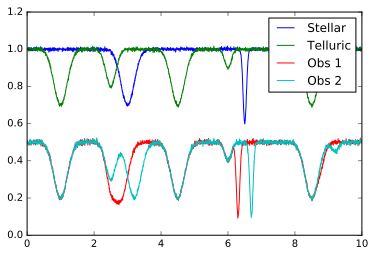

In [89]:

#s = figure(width=750, height=300, title=None)
s = plt.figure()
plt.plot(wavelength, stellar_lines, label="Stellar")
plt.plot(wavelength, telluric_lines,  label="Telluric")
#plt.plot(wavelength, combined_lines -.5)

plt.plot(wavelength, shift1 -.5, label="Obs 1")
plt.plot(wavelength, shift2 -.5, label="Obs 2")
#plt.plot(wavelength, combined_lines)
#s.line(wavelength, combined_lines, color="red", line_width=1)

#s.title = "Example Spectra"
#s.xaxis.axis_label = 'Wavelength'
#s.yaxis.axis_label = 'Nomalized Flux'
#s.legend.location = "bottom_right"
#s.title_text_font_size = "14pt"
#s.xaxis.axis_label_text_font_size = "12pt"
#s.yaxis.axis_label_text_font_size = "12pt"
#s.set(x_range=Range1d(2116, 2122), y_range=Range1d(0.68, 1.04))

plt.legend()
plt.show(s)

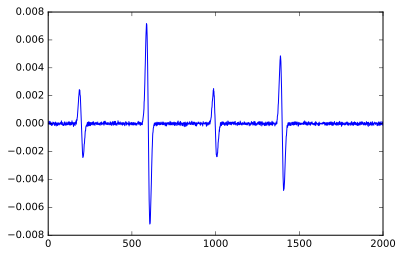

In [88]:
# Create small planetary signal and see if can recover it.
planet_amp = [.01, .03, .01, .02]
planet_means = [ 1, 3, 5, 7]
planet_stddevs =  [.05, .05, .05, .05]
planet_lines = mk_gaussian_sum(wavelength, planet_amp, planet_means, planet_stddevs,noise=0.00005)

planet_lines_shifted = mk_gaussian_sum(wavelength+0.02, planet_amp, planet_means, planet_stddevs, noise=0.00005 )

subtraction = planet_lines - planet_lines_shifted

plt.plot(subtraction)
plt.show()